In [2]:
#load libraries
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

In [4]:
#load dataset from keras name-fashion_mnist
(xtrain,ytrain),(xtest,ytest)=keras.datasets.fashion_mnist.load_data()

In [5]:
xtrain.shape

(60000, 28, 28)

In [6]:
xtest.shape

(10000, 28, 28)

In [8]:
xtrain[0]#gray scale image -0 represent-white and 255 -black and in between light dark

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
ytrain[0]

9

In [10]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

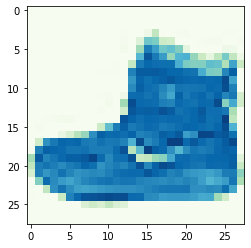

In [13]:
plt.imshow(xtrain[0],cmap='GnBu')

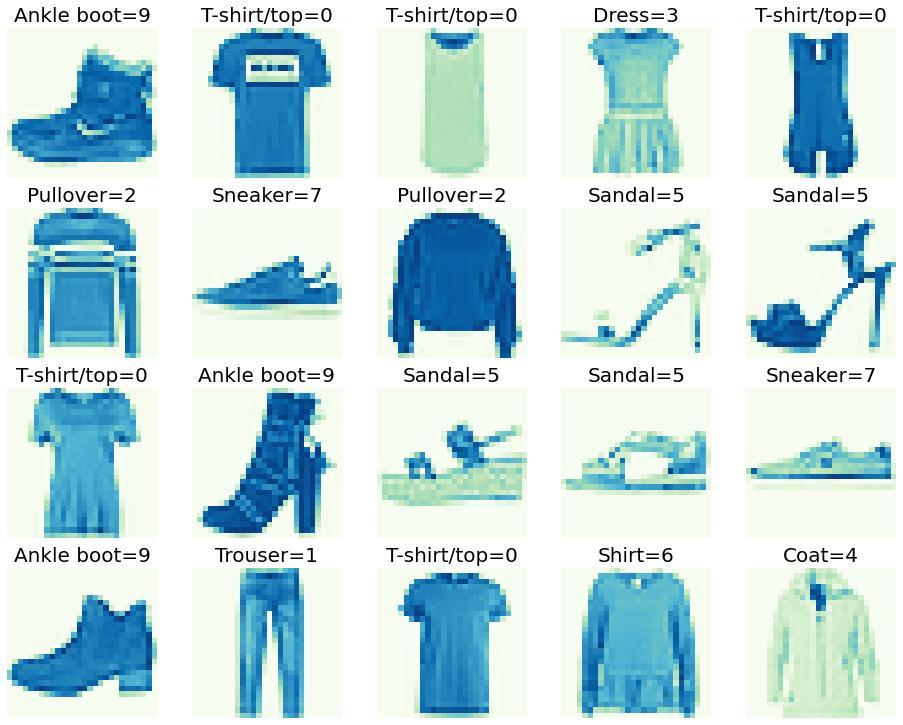

In [16]:
plt.figure(figsize=(16,16))
for i in range(20):
    plt.subplot(5,5,i+1) #5X5 matrix and position the image
    plt.imshow(xtrain[i],cmap='GnBu')
    plt.axis('off')
    plt.title(class_labels[ytrain[i]]+"="+str(ytrain[i]),fontsize=20) #put the class label list and imge name pick by index

In [18]:
#feature scaling
xtrain=xtrain/255
xtest=xtest/255

In [23]:
#build NN
model=keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),\
                               keras.layers.Dense(units=32,activation='relu'),\
                               keras.layers.Dense(units=28,activation='relu'),\
                               keras.layers.Dense(units=10,activation='softmax')])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 28)                924       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                290       
Total params: 26,334
Trainable params: 26,334
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.fit(xtrain,ytrain,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 75us/step - loss: 0.3947 - accuracy: 0.8586
Epoch 2/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.3600 - accuracy: 0.8700
Epoch 3/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.3396 - accuracy: 0.8761
Epoch 4/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.3254 - accuracy: 0.8806
Epoch 5/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.3128 - accuracy: 0.8845


In [35]:
model.evaluate(xtest,ytest)[1]#score value

10000/10000 [==============================] - 0s 43us/step


0.8705000281333923

In [36]:
#prediction
ypred=model.predict(xtest)

In [38]:
ypred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.04, 0.  , 0.92],
      dtype=float32)

In [39]:
np.argmax(ypred[0].round(2))

9

In [40]:
ytest[0]

9

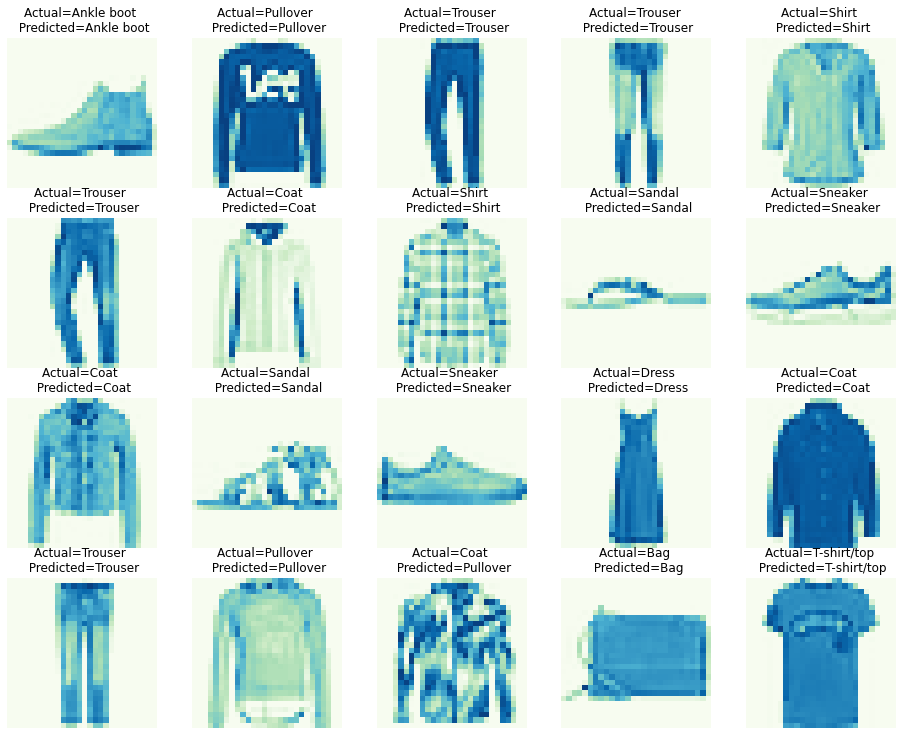

In [42]:
plt.figure(figsize=(16,16))
for i in range(20):
    plt.subplot(5,5,i+1) #5X5 matrix and position the image
    plt.imshow(xtest[i],cmap='GnBu')
    plt.axis('off')
    plt.title('Actual={} \n Predicted={}'.format(class_labels[ytest[i]],class_labels[np.argmax(ypred[i])]))

In [43]:
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
cm=confusion_matrix(ytest,[np.argmax(i) for i in ypred])

In [45]:
cm

array([[834,  13,  13,  39,  10,   2,  74,   1,  14,   0],
       [  0, 974,   2,  16,   3,   0,   2,   0,   3,   0],
       [ 13,   8, 792,  14, 115,   0,  54,   0,   4,   0],
       [ 15,  36,  10, 854,  60,   0,  20,   0,   5,   0],
       [  0,   3, 108,  18, 837,   0,  31,   0,   3,   0],
       [  0,   0,   0,   0,   0, 957,   0,  31,   1,  11],
       [135,   6, 102,  42, 102,   0, 597,   0,  16,   0],
       [  0,   0,   0,   0,   0,  26,   0, 945,   1,  28],
       [  1,   2,   3,   5,   5,   5,   5,   7, 967,   0],
       [  0,   0,   0,   0,   0,  15,   1,  36,   0, 948]], dtype=int64)

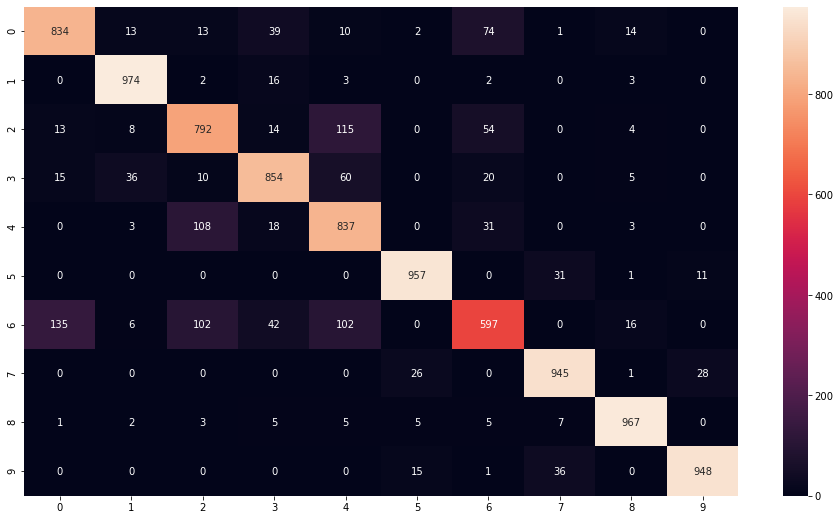

In [46]:
plt.figure(figsize=(16,9))
sns.heatmap(cm,annot=True,fmt='d')

In [47]:
cr=classification_report(ytest,[np.argmax(i) for i in ypred],target_names=class_labels,)

In [50]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.83      0.83      1000
     Trouser       0.93      0.97      0.95      1000
    Pullover       0.77      0.79      0.78      1000
       Dress       0.86      0.85      0.86      1000
        Coat       0.74      0.84      0.79      1000
      Sandal       0.95      0.96      0.95      1000
       Shirt       0.76      0.60      0.67      1000
     Sneaker       0.93      0.94      0.94      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.96      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [51]:
model.save('mnistfashion_classifier.h5')